In [1]:
from IPython.display import display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\mafane\AppData\Local\Temp\ipykernel_19080\851035096.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Die Normalengleichung

In [66]:
np.random.seed(42)

m = 100 # Anzahl Instanzen
X = 2 * np.random.rand(m, 1) # Spaltenvektor
y = 4 + 3 * X + np.random.rand(m, 1) # Spaltenvektor

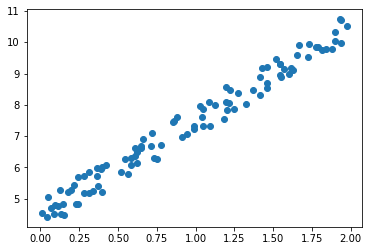

In [10]:
plt.scatter(X, y);

In [61]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # Matrixmultiplikation

In [62]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [64]:
print(f'Gewicht: {lin_reg.coef_}')
print(f'Bias-Term: {lin_reg.intercept_}')

Gewicht: [[2.98323418]]
Bias-Term: [4.51359766]


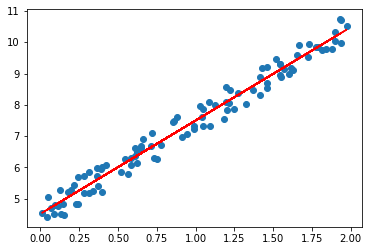

In [69]:
y_lin = lin_reg.coef_[0][0] * X + lin_reg.intercept_[0]

plt.scatter(X, y);
plt.plot(X, y_lin, color='red');

# Stochastisches Gradientenverfahren (SGD)

In [26]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    max_iter=1000,         # Epochen
    tol=1e-5,              #
    penalty=None,          # Keine Regularisierung
    eta0=0.01,             # Lernrate
    n_iter_no_change=100,  # Läuft, bis Verlust während 100 Epochen um weniger als 1e-5 (tol) sinkt
    random_state=42
)

In [28]:
sgd_reg.fit(X, y.ravel()) # ravel, da fit 1-D erwartet

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [30]:
print(f'Gewichte: {sgd_reg.coef_}')
print(f'Bias-Term: {sgd_reg.intercept_}')

Gewichte: [2.99156535]
Bias-Term: [4.50316965]


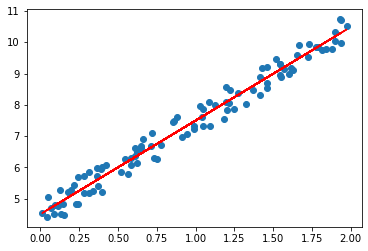

In [70]:
y_lin = sgd_reg.coef_[0] * X + sgd_reg.intercept_[0]

plt.scatter(X, y);
plt.plot(X, y_lin, color='red');

# Polynominelle Regression

In [85]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)

In [93]:
# Fügt zu jedem Merkmal in den Traininsdaten dessen Quadrat als neues Merkmal hinzu
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [94]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [95]:
# Lineares Modell auf erweiterte Trainingsdaten anwenden
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(f'Gewichte: {lin_reg.coef_}')
print(f'Bias-Term: {lin_reg.intercept_}')

Gewichte: [[0.9943591  0.49967213]]
Bias-Term: [2.49786712]


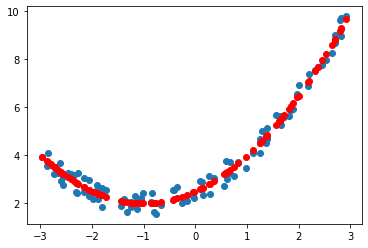

In [98]:
y_lin = lin_reg.coef_[0][1] * X ** 2 + lin_reg.coef_[0][0] * X + lin_reg.intercept_[0]

plt.scatter(X, y);
plt.scatter(X, y_lin, color='red');